In [35]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\GCE-
[nltk_data]     PMNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GCE-
[nltk_data]     PMNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\GCE-
[nltk_data]     PMNA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df=pd.read_csv("spam Dataset.csv")

In [7]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
df.size

20684

In [11]:
df.shape

(5171, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


In [17]:
# Drop unnecessary columns
df=df.drop(['Unnamed: 0','label'],axis=1)

In [19]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [25]:
# Text Cleaning + Lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)  # remove emails
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove special characters and digits
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

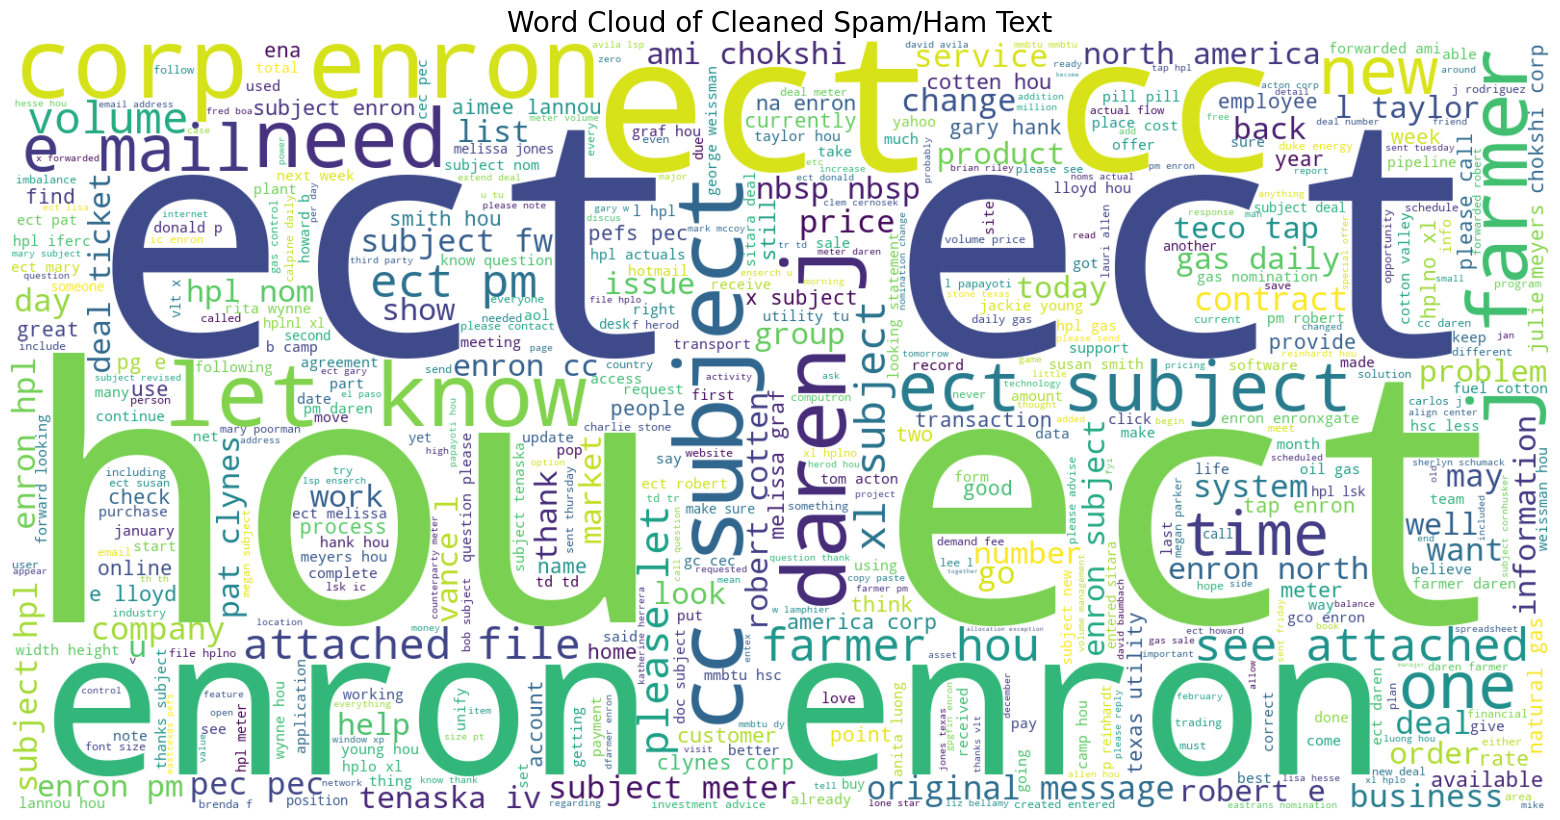

In [27]:
# Word Cloud
text_data = " ".join(df['clean_text'])
wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=500).generate(text_data)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Spam/Ham Text", fontsize=20)
plt.show()

In [29]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label_num']

In [31]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [47]:
def evaluate_model(name, y_true, y_pred):
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [49]:
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)

----- Logistic Regression -----
Accuracy: 0.9845410628019323
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

----- Decision Tree -----
Accuracy: 0.9487922705314009
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       742
           1       0.92      0.89      0.91       293

    accuracy                           0.95      1035
   macro avg       0.94      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035

----- Random Forest -----
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     

In [55]:
# Initialize models
LR = LogisticRegression(max_iter=1000)
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Store accuracies
test_accuracies = []
train_accuracies = []

models = [LR, XGB, RF, DT]
names = ['Logistic Regression', 'XGBoost', 'Random Forest', 'Decision Tree']

for model in models:
    model.fit(X_train, y_train)
    test_acc = round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)
    train_acc = round(accuracy_score(y_train, model.predict(X_train)) * 100, 2)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

# Display comparison
for name, train, test in zip(names, train_accuracies, test_accuracies):
    print(f"{name} → Train Accuracy: {train}% | Test Accuracy: {test}%")

Logistic Regression → Train Accuracy: 99.49% | Test Accuracy: 98.45%
XGBoost → Train Accuracy: 99.59% | Test Accuracy: 97.0%
Random Forest → Train Accuracy: 99.98% | Test Accuracy: 97.97%
Decision Tree → Train Accuracy: 99.98% | Test Accuracy: 95.07%
